In [1]:
from math import erf

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# CDF for a random variable with distribution N(0,1)
def cdf_n_std(t):
    return (1 + erf(t/(2. ** 0.5)))/2.

# CDF for a random variable with distribution N(m,sd^2)
def cdf_normal(t, m=0, sd=1):
    return cdf_n_std((t - m)/sd)

# Returns lower and upper quartile
def quartiles(x):
    s = np.sort(x)
    q2 = np.median(x)
    return np.median(s[s <= q2]), np.median(s[s >= q2])

# Returns mask for those values in sample, that are not outliers
def out(x):
    q1, q3 = quartiles(x)
    iqr = q3 - q1
    return (q1 - 1.5 * iqr <= x) & (x <= q3 + 1.5 * iqr)

In [3]:
mu, sigma = 0, 1
N = 2000

In [4]:
X = nr.normal(mu, sigma, N)
Z = nr.standard_cauchy(N)

S = pd.DataFrame({'X': X, 'Z': Z})

In [5]:
X_F = X[out(X)]
Z_F = Z[out(Z)]

In [6]:
M1, M2 = abs(S) > 1, abs(S) > 3
C1, C2 = np.sum(M1), np.sum(M2)
print(C1, C2, sep='\n')

X    651
Z    979
dtype: int64
X      4
Z    413
dtype: int64


In [7]:
N_BINS = 42

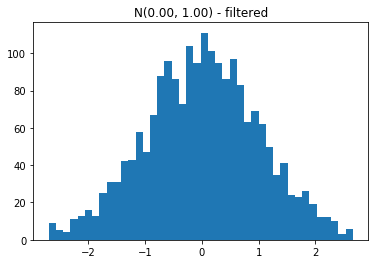

In [8]:
plt.hist(X_F, bins=N_BINS)
plt.title('N(%.2f, %.2f) - filtered' % (mu, sigma))
plt.show()

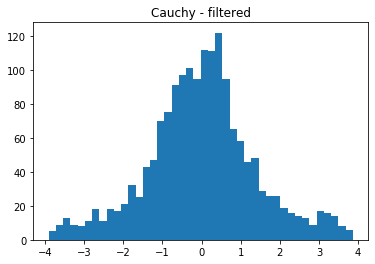

In [9]:
plt.hist(Z_F, bins=N_BINS)
plt.title('Cauchy - filtered')
plt.show()

In [10]:
E_CDF_X, E_CDF_Z = ECDF(X), ECDF(Z)
LS_X, LS_Z = np.linspace(np.min(X_F), np.max(X_F)), np.linspace(np.min(Z_F), np.max(Z_F))
E_X, E_Z = E_CDF_X(LS_X), E_CDF_Z(LS_Z)

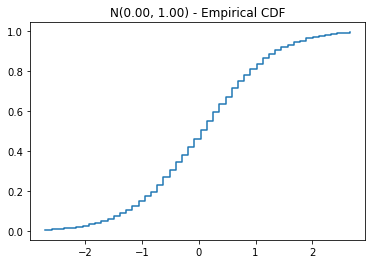

In [11]:
plt.step(LS_X, E_X, where='post')
plt.title('N(%.2f, %.2f) - Empirical CDF' % (mu, sigma))
plt.show()

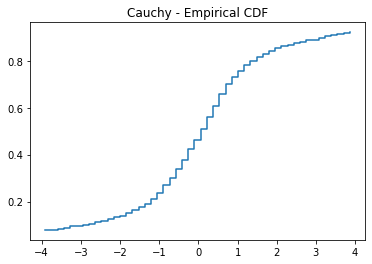

In [12]:
plt.step(LS_Z, E_Z, where='post')
plt.title('Cauchy - Empirical CDF')
plt.show()

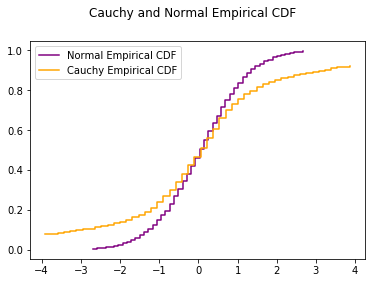

In [13]:
f, ax = plt.subplots(1, 1)
f.suptitle('Cauchy and Normal Empirical CDF', y=1)
ax.step(LS_X, E_X, color='purple', label='Normal Empirical CDF', where='post')
ax.step(LS_Z, E_Z, color='orange', label='Cauchy Empirical CDF', where='post')
ax.legend()
plt.show()

In [14]:
S_MEAN, S_SD = S.mean(), S.std()
print(S_MEAN, S_SD, sep='\n')

X    0.010381
Z    0.303107
dtype: float64
X      1.028588
Z    124.539334
dtype: float64


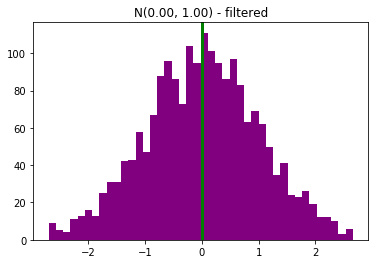

In [15]:
# Plotting histogram with sample mean line, normal distribution
plt.hist(X_F, bins=N_BINS, color='purple')
plt.axvline(x=S_MEAN.X, color='green', linewidth=3)
plt.title('N(%.2f, %.2f) - filtered' % (mu, sigma))
plt.show()

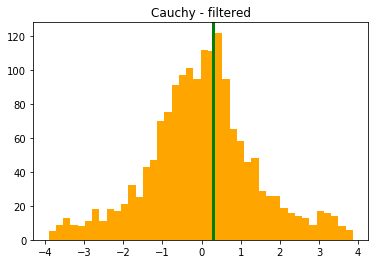

In [16]:
# Plotting histogram with sample mean line, cauchy distribution
plt.hist(Z_F, bins=N_BINS, color='orange')
plt.axvline(x=S_MEAN.Z, color='green', linewidth=3)
plt.title('Cauchy - filtered')
plt.show()

In [17]:
# Calculating probabilities by sample and theoretical CDFs
P1_E = 1 - E_CDF_X(S_MEAN.X + S_SD.X * 3) + E_CDF_X(S_MEAN.X - S_SD.X * 3)
P1_T = 1 - cdf_normal(S_MEAN.X + S_SD.X * 3) + cdf_normal(S_MEAN.X - S_SD.X * 3)
print('E Normal CDF: %.4f\n'
      'T Normal CDF: %.4f' % (P1_E, P1_T))

E Normal CDF: 0.0020
T Normal CDF: 0.0020


In [18]:
# M2 - red
# M3 - blue
# M4 - green
dot_size = 7
plot_size = (14,8)

In [19]:
M3 = M1 & ~M2

In [20]:
M4 = ~M1

Text(0.5, 1.0, 'N(0.00, 1.00) - scatterplot')

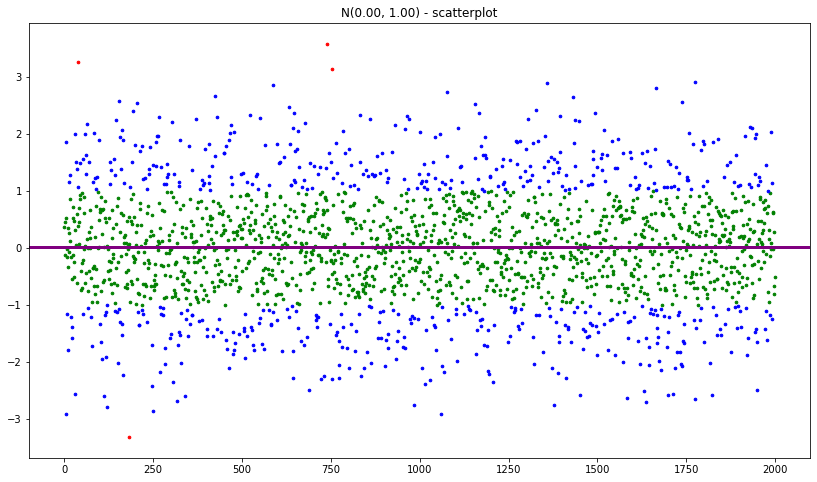

In [21]:
plt.figure(figsize=plot_size)
plt.scatter(S[M4].X.index, S[M4].X, color='green', s=dot_size)
plt.scatter(S[M3].X.index, S[M3].X, color='blue', s=dot_size)
plt.scatter(S[M2].X.index, S[M2].X, color='red', s=dot_size)
plt.axhline(y=S_MEAN.X, color='purple', linewidth=3)
plt.title('N(%.2f, %.2f) - scatterplot' % (mu, sigma))

Text(0.5, 1.0, 'Cauchy - scatterplot')

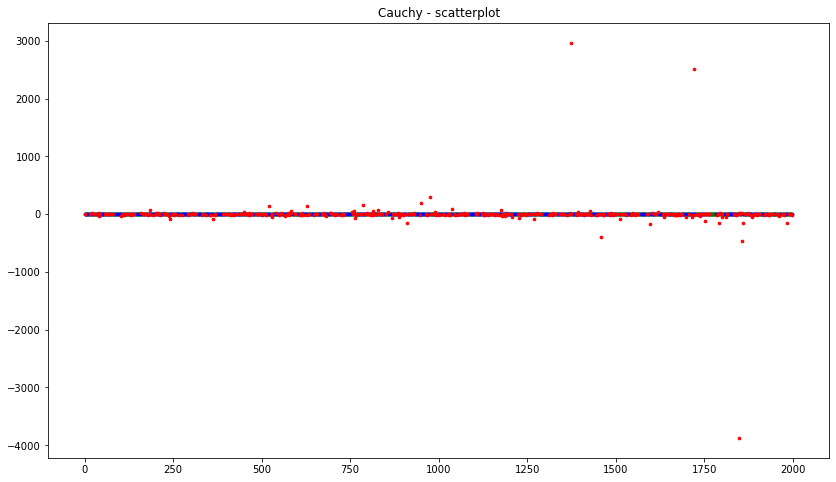

In [22]:
plt.figure(figsize=plot_size)
plt.scatter(S[M4].Z.index, S[M4].Z, color='green', s=dot_size)
plt.scatter(S[M3].Z.index, S[M3].Z, color='blue', s=dot_size)
plt.scatter(S[M2].Z.index, S[M2].Z, color='red', s=dot_size)
plt.title('Cauchy - scatterplot')

Text(0.5, 1.0, 'Cauchy - filtered - scatterplot')

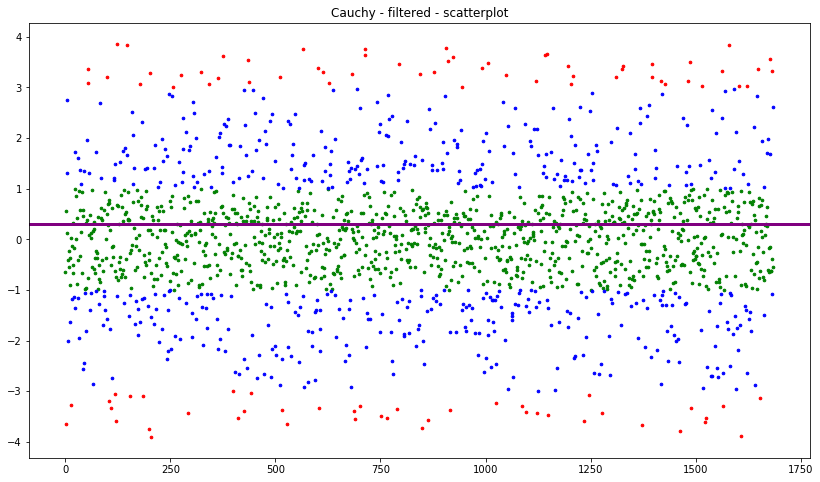

In [23]:
plt.figure(figsize=plot_size)
plt.scatter(np.nonzero(abs(Z_F) <= 1)[0], Z_F[abs(Z_F) <= 1], color='green', s=dot_size)
plt.scatter(np.nonzero((1 < abs(Z_F)) & (abs(Z_F) <= 3))[0], Z_F[(1 < abs(Z_F)) & (abs(Z_F) <= 3)], color='blue', s=dot_size)
plt.scatter(np.nonzero(abs(Z_F) > 3)[0], Z_F[abs(Z_F) > 3], color='red', s=dot_size)
plt.axhline(y=S_MEAN.Z, color='purple', linewidth=3)
plt.title('Cauchy - filtered - scatterplot')